In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp
display(df) #xuất table
#print("So canh ", len(df))



Name      Occupation
0                        Pauline Sabin  Politics & Gov
1    Vere Ponsonby Earl of Bessborough  Politics & Gov
2                      Ellsworth Vines          Sports
3                     Norman M. Thomas  Politics & Gov
4                           Chico Marx   Entertainment
..                                 ...             ...
295                   Colby M. Chester        Business
296                      Joseph Stalin  Politics & Gov
297                        Walt Disney        Business
298                    Chiang Kai-shek  Politics & Gov
299             Madame Chiang Kai-shek  Politics & Gov

[300 rows x 2 columns]

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp
#display(df) #xuất table

B = nx.Graph()
Occupation = df['Occupation']
Name = df['Name']

print("Số thể loại tạp chí ngành nghề", Occupation.nunique())
print("Số người được đăng ", Name.nunique())
print("Số cạnh ", len(df))

Số thể loại tạp chí ngành nghề 17
Số người được đăng  280
Số cạnh  300


<Figure size 864x864 with 0 Axes>

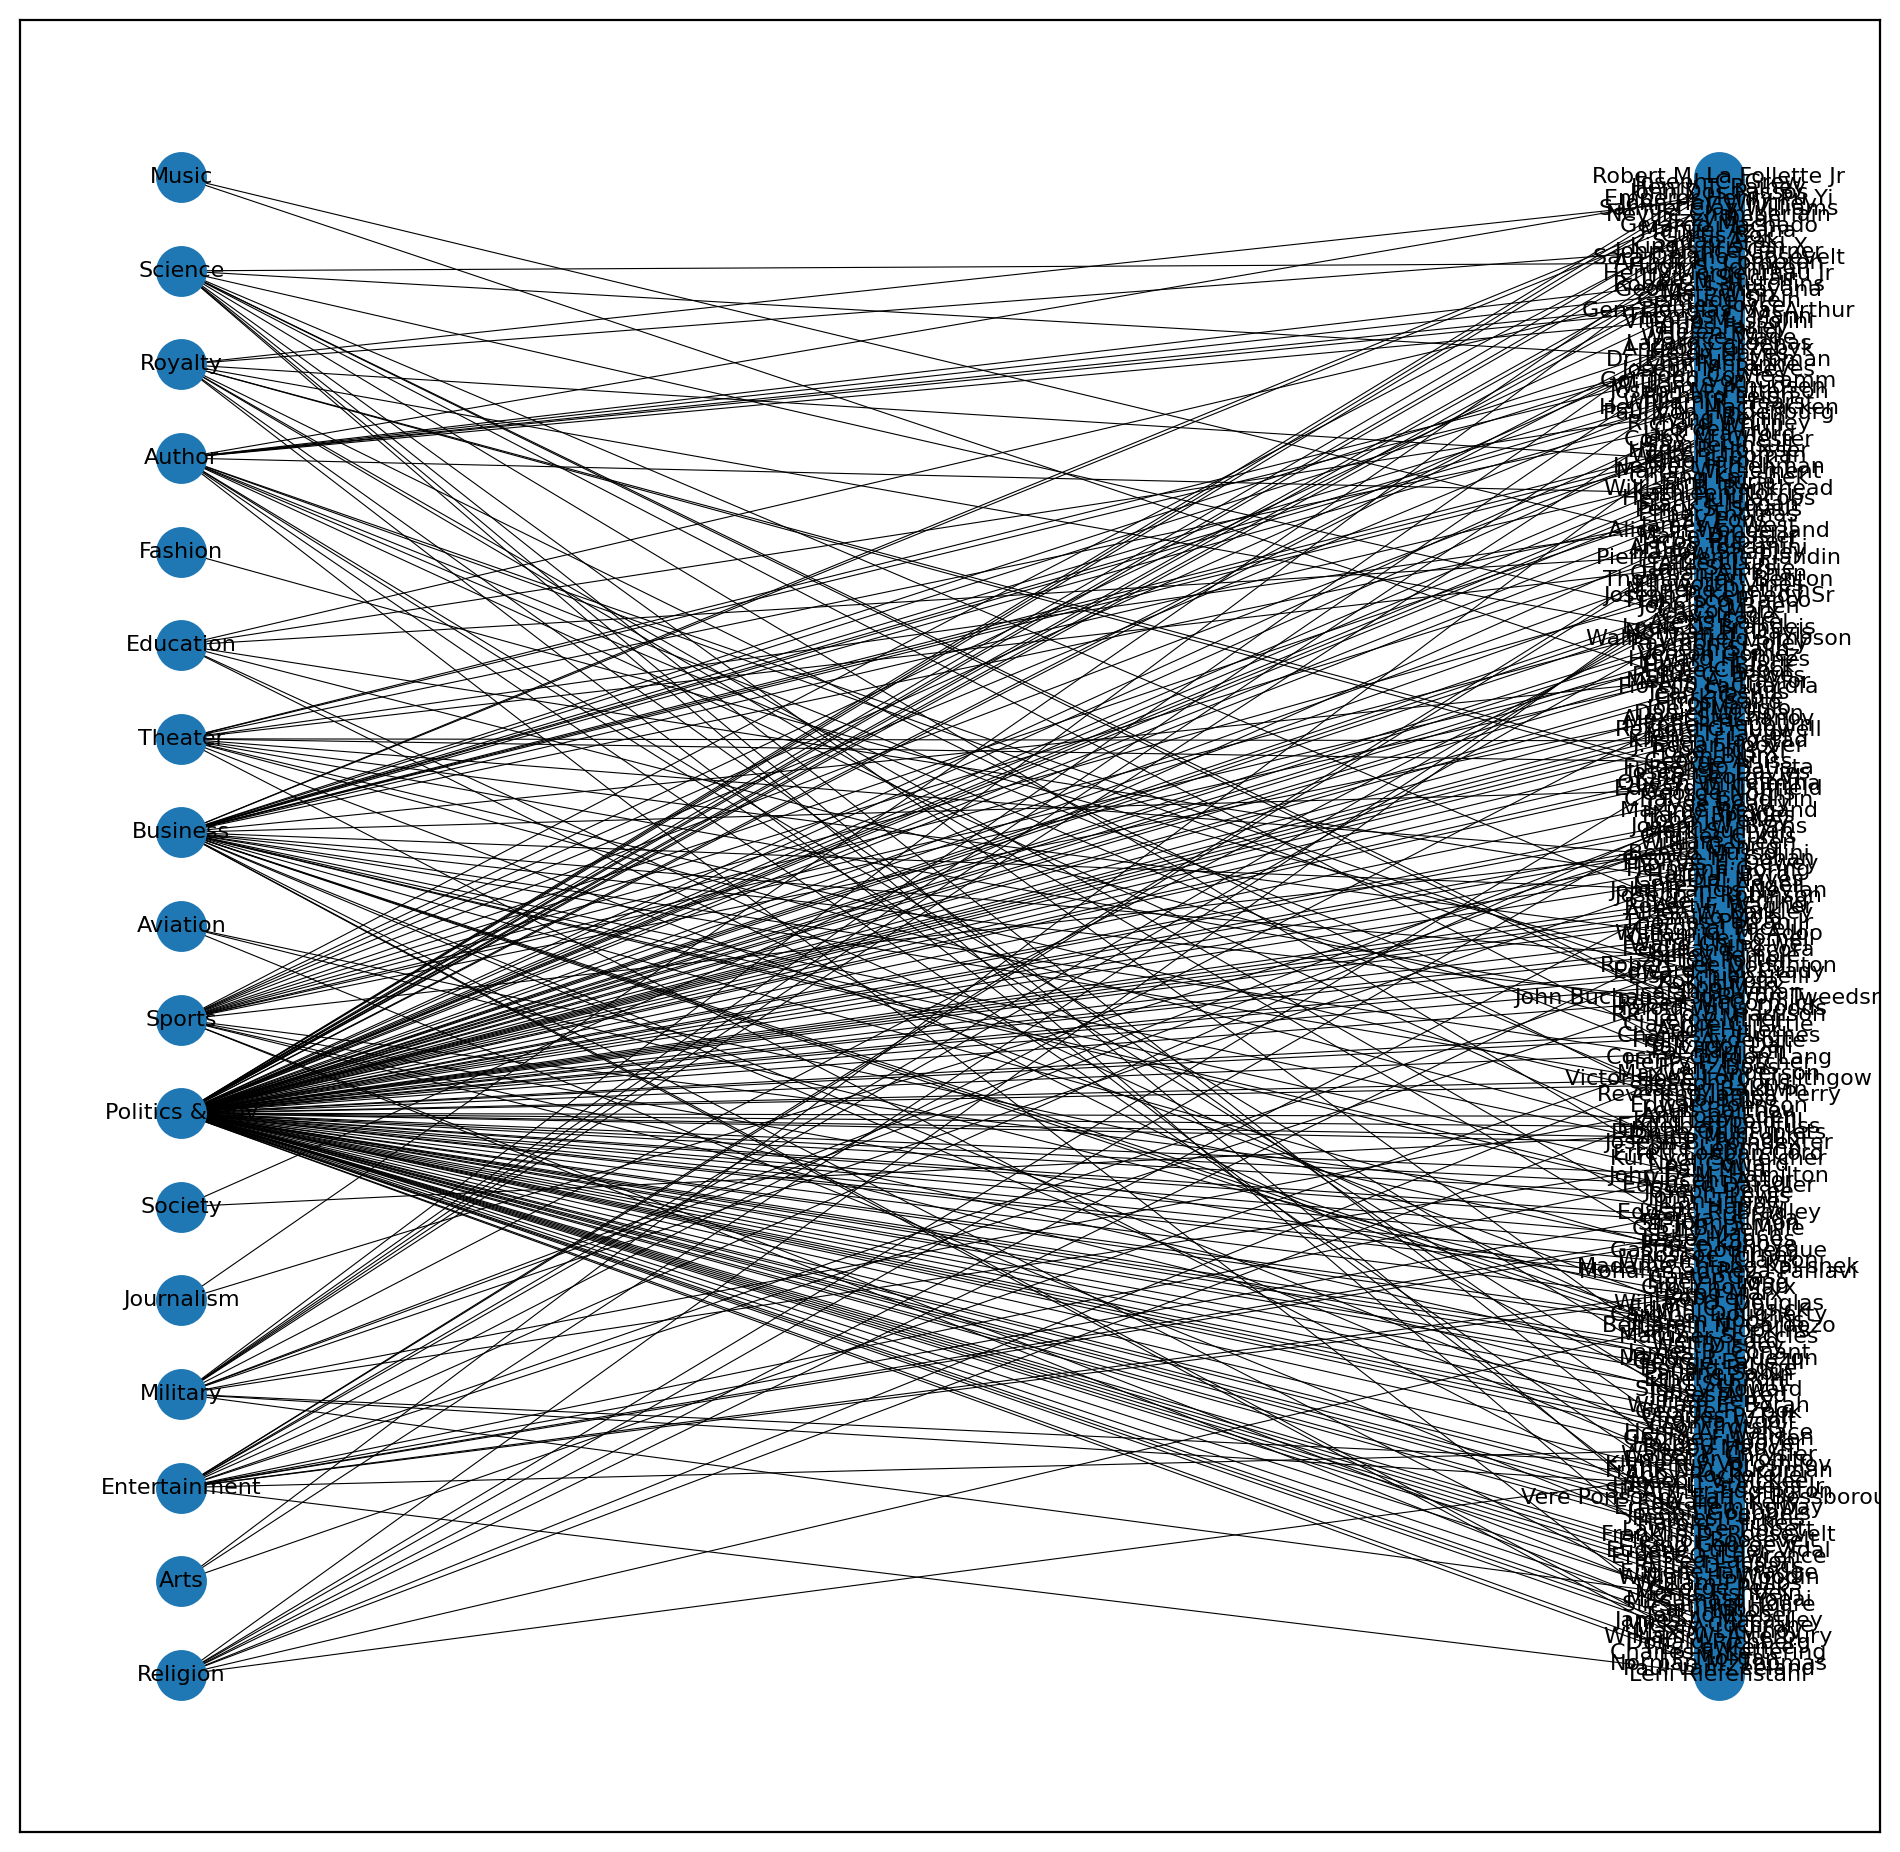

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp

B = nx.Graph()
Occupation = df['Occupation']
Name = df['Name']

for index, row in df.iterrows():
    B.add_edge(row['Occupation'], row['Name'], weight=1)
B.add_nodes_from(Name, bipartite = 0) #thêm nút source thuộc tập hợp 0
B.add_nodes_from(Occupation, bipartite = 1) #thêm nút source thuộc tập hợp 1

plt.figure(figsize=(12, 12)) #Tạo một hình trắng mới với size 20,20
pos = nx.spring_layout(B) #Vẽ đồ thị
#plt.subplots()là một hàm trả về một bộ giá trị chứa (các) đối tượng hình và trục
#Vì vậy, khi sử dụng, fig, ax = plt.subplots()bạn giải nén bộ này vào các biến fig và ax.
fig, ax = plt.subplots(1,1, figsize=(12,12), dpi = 200) #dpi là độ phân giải
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B,Occupation),font_size=8,width=0.4) #draw_networkx(B: đồ thị, pos: khóa và vị trí)

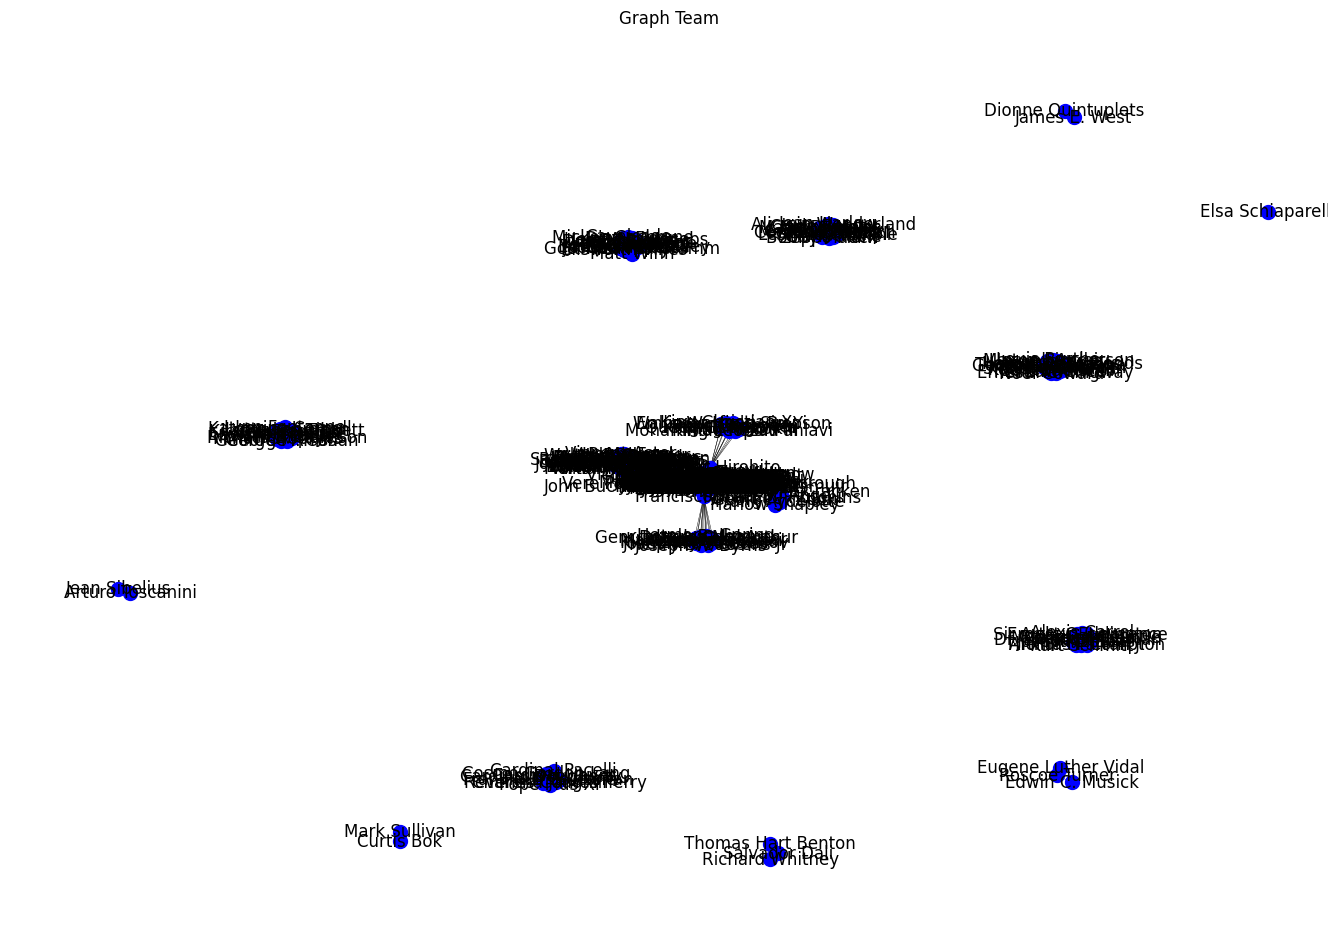

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp

B = nx.Graph()
Occupation = df['Occupation']
Name = df['Name']

for index, row in df.iterrows():
    B.add_edge(row['Name'], row['Occupation'], weight=1)
B.add_nodes_from(Name, bipartite = 0) #thêm nút source thuộc tập hợp 0
B.add_nodes_from(Occupation, bipartite = 1) #thêm nút source thuộc tập hợp 1

G = bipartite.weighted_projected_graph(B, Name) #Trả về một phép chiếu có trọng số của B lên một trong các tập hợp node của nó.

plt.figure(num=None, figsize=(17, 12), dpi=100, facecolor='w') #Tạo 1 hình trắng

layout = nx.spring_layout(G)

nx.draw_networkx_nodes( 
    G,
    layout,
    nodelist = Name,
    node_size =100,
    node_color = 'blue'
)

nx.draw_networkx_edges(G, layout, edge_color="k", width=0.3) #Vẽ cạnh với màu là xám #cccccc
node_labels = dict(zip(Name, Name)) #dict và zip để nối các node quen cùng 1 người với nhau
nx.draw_networkx_labels(G, layout, labels=node_labels) 
plt.axis('off') #Tắt trục, xóa trục x và y khỏi biểu đồ

plt.title("Graph Team") #Tên đồ thị

plt.show() #in đồ thị

labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns = ['source', 'target', 'weight'])
for key, value in labels.items():
    df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
df2.to_csv (r'mydata4.csv', index = False, header=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp
G = bipartite.weighted_projected_graph(B, Name)
B = nx.Graph()
Occupation = df['Occupation']
Name = df['Name']

for index, row in df.iterrows():
    B.add_edge(row['Name'], row['Occupation'], weight=1)
B.add_nodes_from(Occupation, bipartite = 0) #thêm nút source thuộc tập hợp 0
B.add_nodes_from(Name, bipartite = 1) #thêm nút source thuộc tập hợp 1

betweenness_centrality = nx.betweenness_centrality(G)
sort_betweenness_centrality = dict(sorted(betweenness_centrality.items(), key=lambda kv:kv[1], reverse =True))
#top5between = pd.DataFrame(list(sort_betweenness_centrality.items()), columns=['Node', 'Betweenness Centrality'])
#display(top5between.head(10))
print("Độ đo Betweeness")
print()
display(sort_betweenness_centrality)


Độ đo Betweeness



{'Abby Rockefeller': 0.0,
 'Adolf Hitler': 0.0,
 'Alben W. Barkley': 0.0,
 'Alexei Stakhanov': 0.0,
 'Alexis Carrel': 0.0,
 'Alfred Landon': 0.0,
 'Alfred Lunt': 0.0,
 'Alice in Wonderland': 0.0,
 'Anthony Eden': 0.0,
 'Anthony Grzebyk': 0.0,
 'Arthur H. Compton': 0.0,
 'Arturo Toscanini': 0.0,
 'Benito Mussolini': 0.0,
 'Benjamin N. Cardozo': 0.0,
 'Billy Mauch': 0.0,
 'Bob Feller': 0.0,
 'Bobby Mauch': 0.0,
 'Bruno Mussolini': 0.0,
 'Cardinal Dougherty': 0.0,
 'Cardinal Hayes': 0.0,
 'Cardinal Pacelli': 0.0,
 'Carl Hubbell': 0.0,
 'Carter Glass': 0.0,
 'Cavalcade': 0.0,
 'Cecil B. DeMille': 0.0,
 'Charles Coughlin': 0.0,
 'Charles Curtis': 0.0,
 'Charles E. Hughes': 0.0,
 'Charles F. Kettering': 0.0,
 'Charles P. Taft': 0.0,
 'Chiang Kai-shek': 0.0,
 'Chico Marx': 0.0,
 'Clarence C. Little': 0.0,
 'Clark Gable': 0.0,
 'Clyde Beatty': 0.0,
 'Clyde L. Herring': 0.0,
 'Colby M. Chester': 0.0,
 'Cordell Hull': 0.0,
 'Cosmo Gordon Lang': 0.0,
 'Curtis Bok': 0.0,
 'Daniel W. Hoan': 0.0,
 '

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp
G = bipartite.weighted_projected_graph(B, Name)

B = nx.Graph()
Occupation = df['Occupation']
Name = df['Name']

for index, row in df.iterrows():
    B.add_edge(row['Name'], row['Occupation'], weight=1)
B.add_nodes_from(Occupation, bipartite = 0) #thêm nút source thuộc tập hợp 0
B.add_nodes_from(Name, bipartite = 1) #thêm nút source thuộc tập hợp 1

Closeness_measure = nx.closeness_centrality(G)
sort_Closeness_measure = dict(sorted(Closeness_measure.items(), key=lambda kv:kv[1], reverse =True))
#top5close = pd.DataFrame(list(sort_Closeness_measure.items()), columns=['Node', 'Closeness Measure'])
#display(top5close.head(10))
print("Độ đo Closeness")
display(sort_Closeness_measure)

Độ đo Closeness


{'Abby Rockefeller': 0.32529140688533476,
 'Adolf Hitler': 0.48186320439030916,
 'Alben W. Barkley': 0.48186320439030916,
 'Alexei Stakhanov': 0.48186320439030916,
 'Alexis Carrel': 0.03942652329749104,
 'Alfred Landon': 0.48186320439030916,
 'Alfred Lunt': 0.04659498207885305,
 'Alice in Wonderland': 0.053763440860215055,
 'Anthony Eden': 0.48186320439030916,
 'Anthony Grzebyk': 0.32529140688533476,
 'Arthur H. Compton': 0.03942652329749104,
 'Arturo Toscanini': 0.0035842293906810036,
 'Benito Mussolini': 0.48186320439030916,
 'Benjamin N. Cardozo': 0.48186320439030916,
 'Billy Mauch': 0.053763440860215055,
 'Bob Feller': 0.06451612903225806,
 'Bobby Mauch': 0.053763440860215055,
 'Bruno Mussolini': 0.48186320439030916,
 'Cardinal Dougherty': 0.02867383512544803,
 'Cardinal Hayes': 0.02867383512544803,
 'Cardinal Pacelli': 0.02867383512544803,
 'Carl Hubbell': 0.06451612903225806,
 'Carter Glass': 0.48186320439030916,
 'Cavalcade': 0.06451612903225806,
 'Cecil B. DeMille': 0.053763440

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp
G = bipartite.weighted_projected_graph(B, Name)

B = nx.Graph()
Occupation = df['Occupation']
Name = df['Name']

for index, row in df.iterrows():
    B.add_edge(row['Name'], row['Occupation'], weight=1)
B.add_nodes_from(Occupation, bipartite = 0) #thêm nút source thuộc tập hợp 0
B.add_nodes_from(Name, bipartite = 1) #thêm nút source thuộc tập hợp 1

Pagerank =nx.pagerank(G)
sort_Pagerank = dict(sorted(Pagerank.items(), key=lambda kv:kv[1], reverse =True))
#top5pagerank = pd.DataFrame(list(sort_Pagerank.items()), columns=['Node', 'Pagerank'])
#display(top5pagerank.head(10))
print("Độ đo Pagerank")
display(sort_Pagerank)
print(sort_Pagerank)

Độ đo Pagerank


{'Abby Rockefeller': 0.003262511344906554,
 'Adolf Hitler': 0.0038650992833138974,
 'Alben W. Barkley': 0.0038650992833138974,
 'Alexei Stakhanov': 0.0038650992833138974,
 'Alexis Carrel': 0.0035823034210997677,
 'Alfred Landon': 0.0038650992833138974,
 'Alfred Lunt': 0.0035823034210997686,
 'Alice in Wonderland': 0.0035823034210997673,
 'Anthony Eden': 0.0038650992833138974,
 'Anthony Grzebyk': 0.003262511344906554,
 'Arthur H. Compton': 0.0035823034210997677,
 'Arturo Toscanini': 0.003582303421099766,
 'Benito Mussolini': 0.0038650992833138974,
 'Benjamin N. Cardozo': 0.0038650992833138974,
 'Billy Mauch': 0.0035823034210997673,
 'Bob Feller': 0.0035823034210997673,
 'Bobby Mauch': 0.0035823034210997673,
 'Bruno Mussolini': 0.0038650992833138974,
 'Cardinal Dougherty': 0.0035823034210997673,
 'Cardinal Hayes': 0.0035823034210997673,
 'Cardinal Pacelli': 0.0035823034210997673,
 'Carl Hubbell': 0.0035823034210997673,
 'Carter Glass': 0.0038650992833138974,
 'Cavalcade': 0.0035823034210

{'John L. Lewis': 0.0066299211960545905, 'Francisco Franco': 0.006140091975775357, 'Emperor Hirohito': 0.005947135534352376, 'James B. Conant': 0.005533722191087849, 'Pauline Sabin': 0.0038650992833138974, 'Vere Ponsonby Earl of Bessborough': 0.0038650992833138974, 'Norman M. Thomas': 0.0038650992833138974, 'William G. McAdoo': 0.0038650992833138974, 'Yasuya Uchida': 0.0038650992833138974, 'Huey P. Long': 0.0038650992833138974, 'Rufus D. Isaacs': 0.0038650992833138974, 'James Farley': 0.0038650992833138974, 'Howard H. Jones': 0.0038650992833138974, 'Melvin A. Traylor': 0.0038650992833138974, 'Charles Curtis': 0.0038650992833138974, 'Norman H. Davis': 0.0038650992833138974, 'Henry T. Rainey': 0.0038650992833138974, 'Franklin D. Roosevelt': 0.0038650992833138974, 'Carter Glass': 0.0038650992833138974, 'William W. Atterbury': 0.0038650992833138974, 'Pat Harrison': 0.0038650992833138974, 'Sara Delano Roosevelt': 0.0038650992833138974, 'Adolf Hitler': 0.0038650992833138974, 'William H. Wood

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp

B = nx.Graph()
Occupation = df['Occupation']
Name = df['Name']

for index, row in df.iterrows():
    B.add_edge(row['Name'], row['Occupation'], weight=1)
B.add_nodes_from(Occupation, bipartite = 0) #thêm nút source thuộc tập hợp 0
B.add_nodes_from(Name, bipartite = 1) #thêm nút source thuộc tập hợp 1

clustering_coefficient =nx.clustering(G)
sort_clustering_coefficient = dict(sorted(clustering_coefficient.items(), key=lambda kv:kv[1], reverse =True))
#top5clustering = pd.DataFrame(list(sort_clustering_coefficient.items()), columns=['Node', 'Clustering coefficient'])
#display(top5clustering.head(10))
print("Độ đo Clustering")
display(sort_clustering_coefficient)

Độ đo Clustering


{'Abby Rockefeller': 1.0,
 'Adolf Hitler': 1.0,
 'Alben W. Barkley': 1.0,
 'Alexei Stakhanov': 1.0,
 'Alexis Carrel': 1.0,
 'Alfred Landon': 1.0,
 'Alfred Lunt': 1.0,
 'Alice in Wonderland': 1.0,
 'Anthony Eden': 1.0,
 'Anthony Grzebyk': 1.0,
 'Arthur H. Compton': 1.0,
 'Arturo Toscanini': 0,
 'Benito Mussolini': 1.0,
 'Benjamin N. Cardozo': 1.0,
 'Billy Mauch': 1.0,
 'Bob Feller': 1.0,
 'Bobby Mauch': 1.0,
 'Bruno Mussolini': 1.0,
 'Cardinal Dougherty': 1.0,
 'Cardinal Hayes': 1.0,
 'Cardinal Pacelli': 1.0,
 'Carl Hubbell': 1.0,
 'Carter Glass': 1.0,
 'Cavalcade': 1.0,
 'Cecil B. DeMille': 1.0,
 'Charles Coughlin': 1.0,
 'Charles Curtis': 1.0,
 'Charles E. Hughes': 1.0,
 'Charles F. Kettering': 1.0,
 'Charles P. Taft': 1.0,
 'Chiang Kai-shek': 1.0,
 'Chico Marx': 1.0,
 'Clarence C. Little': 1.0,
 'Clark Gable': 1.0,
 'Clyde Beatty': 1.0,
 'Clyde L. Herring': 1.0,
 'Colby M. Chester': 1.0,
 'Cordell Hull': 1.0,
 'Cosmo Gordon Lang': 1.0,
 'Curtis Bok': 0,
 'Daniel W. Hoan': 1.0,
 'Dion

number of communities:  17
nhom 0 --------------------
Richard Whitney
Thomas Hart Benton
Salvador Dali

nhom 1 --------------------
Dionne Quintuplets
James E. West

nhom 2 --------------------
King George V
Emperor Henry Pu Yi
Mohammad Reza Pahlavi
Queen Wilhelmina
Wallis Warfield Simpson
King George VI
King Christian X
Prince Konoye
King Farouk I
King Leopold III

nhom 3 --------------------
Chico Marx
Groucho Marx
Harpo Marx
Zeppo Marx
Marie Dressler
Alice in Wonderland
Cecil B. DeMille
Jean Harlow
Leni Riefenstahl
Shirley Temple
Clark Gable
Marlene Dietrich
Clyde Beatty
Billy Mauch
Bobby Mauch
Paul Muni

nhom 4 --------------------
Lily Pons
Katharine Cornell
Lawrence Tibbett
George M. Cohan
George Arliss
Irving Berlin
Lotte Lehmann
Richard B. Harrison
Miriam Hopkins
Kirsten Flagstad
Helen Hayes
Edward Johnson
Lynn Fontanne
Alfred Lunt

nhom 5 --------------------
Sir Arthur Eddington
Kurt Schmitt
Dr. Emanuel Libman
Alexis Carrel
Arthur H. Compton
Franz Boas
Joseph DeLee
Leroy Min

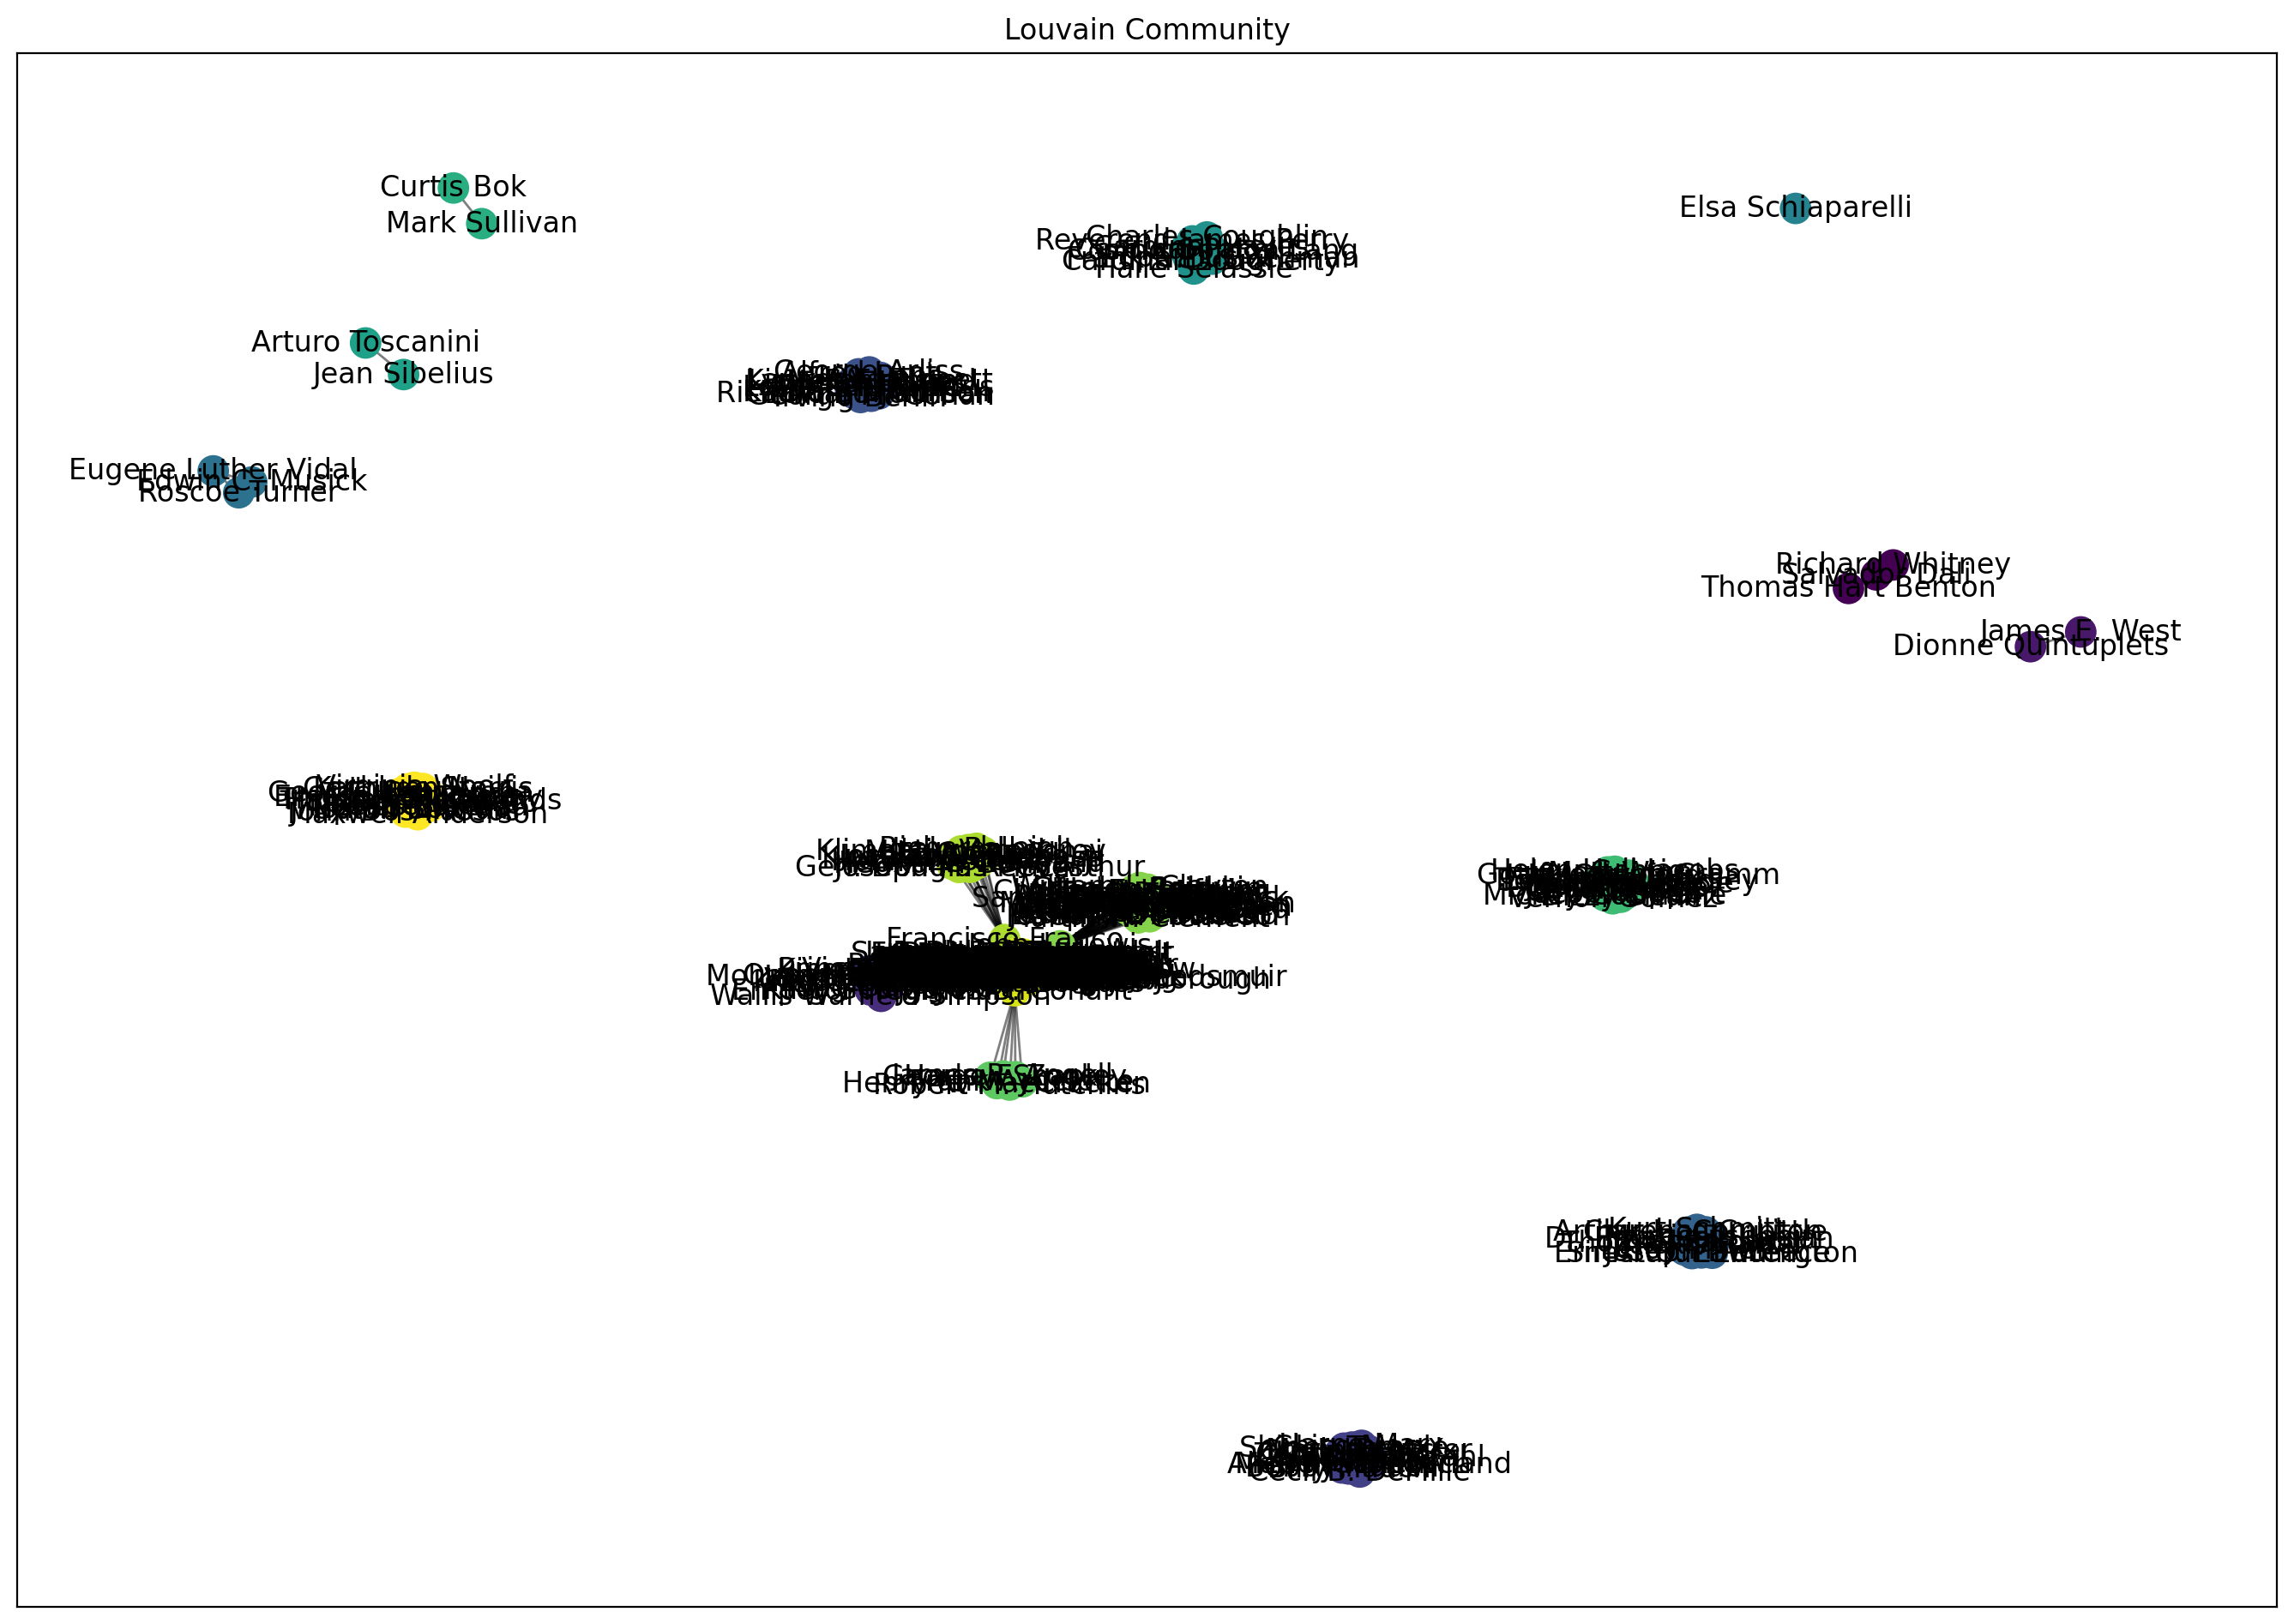

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp

B = nx.Graph()
Occupation = df['Occupation']
Name = df['Name']

for index, row in df.iterrows():
    B.add_edge(row['Name'], row['Occupation'], weight=1)
B.add_nodes_from(Occupation, bipartite = 0) #thêm nút source thuộc tập hợp 0
B.add_nodes_from(Name, bipartite = 1) #thêm nút source thuộc tập hợp 1

#Louvain
plt.figure(figsize=(17, 12), dpi=200) #Vẽ 1 nền trắng với độ phân giải là 200

partition = community_louvain.best_partition(G) #Tính toán sự phân chia tốt nhất

pos = nx.spring_layout(G)#Vẽ đồ thị
cmap = cm.get_cmap('viridis', max(partition.values()) + 1) #Tô màu các node theo cộng đồng của nó
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Louvain Community")

values = list(partition.values())

print("number of communities: ", len(np.unique(values)))

for i in range(len(np.unique(values))):
  print("nhom", i, "--------------------")
  for name, k in partition.items():
    if k == i:
      print(name)
  print("")
  
plt.show()



[list(['Francisco Franco', 'William B. Bankhead', 'Emperor Henry Pu Yi', 'William Green', 'Eugene Talmadge', 'Joseph V. McKee', 'Anthony Grzebyk', 'William S. Knudsen', 'Samuel Insull', 'Italo Balbo', 'Robert F. Wagner', 'Harry Bridges', 'James Allred', 'Clyde L. Herring', 'Adolf Hitler', "John P. O'Brien", 'Norman H. Davis', 'Neville Chamberlain', 'Percy S. Straus', 'John Hay Whitney', 'Samuel Clay Williams', 'Hugh S. Johnson', 'Sir John Simon', 'Marriner S. Eccles', 'Harry L. Hopkins', 'Harry B Housser', 'Benjamin N. Cardozo', 'Rufus C. Dawes', 'Fiorello LaGuardia', 'Joseph Stalin', 'Alfred Landon', 'Mitchell Hepburn', 'Alben W. Barkley', 'Abby Rockefeller', 'Robert M. La Follette Jr', 'George Norris', 'Emilio Mola', 'Osman Ali Khan', 'J. Edgar Hoover', 'Gaston Doumergue', 'Gen. Douglas MacArthur', 'Frances Perkins', 'Pauline Sabin', 'Seton Porter', 'Joseph M. Reeves', 'Herbert Hoover', 'Edward J. Kelly', 'William R. Hearst', 'Eleanor Roosevelt', 'Wallis Warfield Simpson', 'Norman M.

Node
0       Francisco Franco
1    William B. Bankhead
2    Emperor Henry Pu Yi
3          William Green
4        Eugene Talmadge
..                   ...
170  Robert Lee Doughton
171       Maxim Litvinov
172       Torkild Rieber
173           Emil Hurja
174     Henry A. Wallace

[175 rows x 1 columns]

List 2


Node
0         Jacob Ruppert
1            Bob Feller
2            Fred Perry
3          Donald Budge
4          Joe DiMaggio
5       Ellsworth Vines
6          Carl Hubbell
7   Gottfried von Cramm
8          Vernon Gomez
9     Helen Hull Jacobs
10            Cavalcade
11        Jack Crawford
12           Lou Gehrig
13           Dizzy Dean
14            Matt Winn
15         Lorne Chabot
16    Edward R. Bradley
17         Wallace Wade
18      Mickey Cochrane

List 3


Node
0           Bobby Mauch
1           Jean Harlow
2           Billy Mauch
3      Leni Riefenstahl
4            Zeppo Marx
5             Paul Muni
6        Shirley Temple
7            Harpo Marx
8        Marie Dressler
9      Marlene Dietrich
10          Clark Gable
11           Chico Marx
12         Clyde Beatty
13         Groucho Marx
14  Alice in Wonderland
15     Cecil B. DeMille

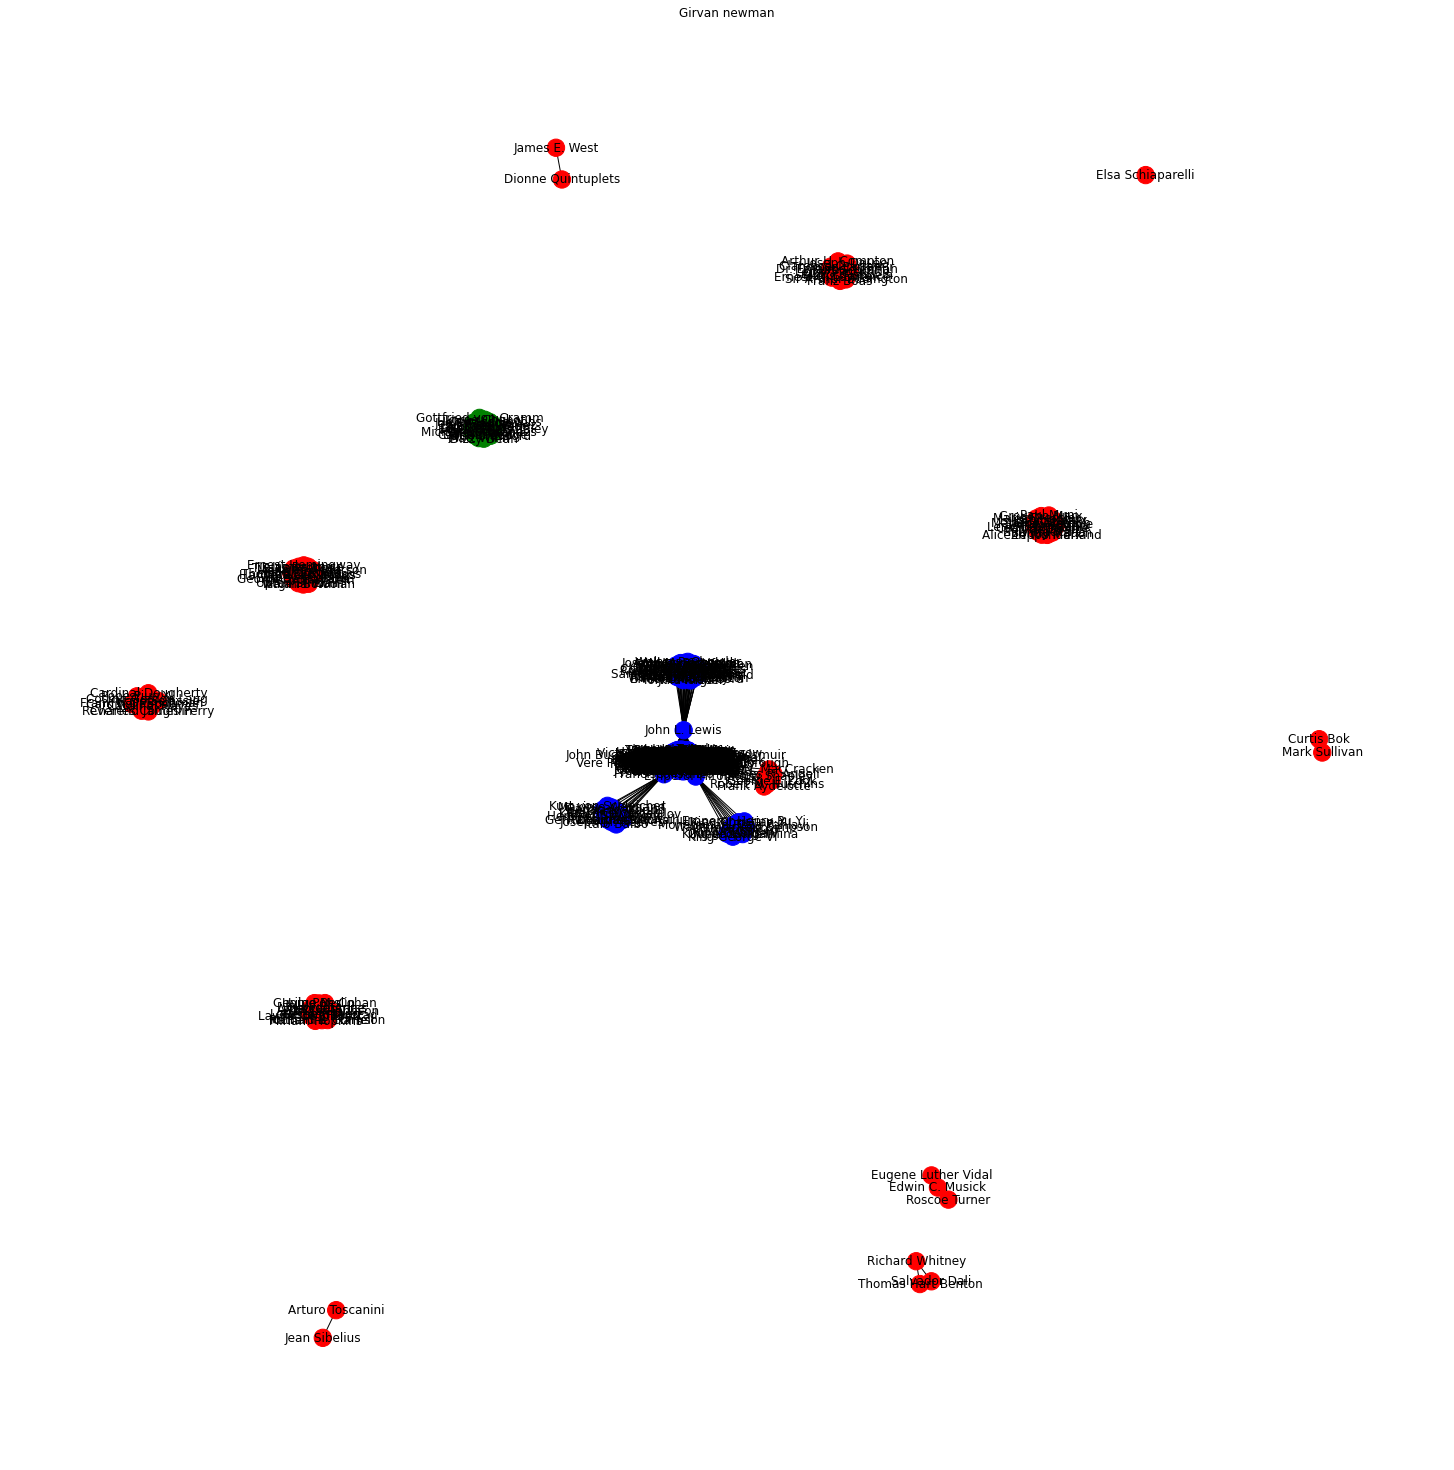

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp

B = nx.Graph()
Occupation = df['Occupation']
Name = df['Name']

for index, row in df.iterrows():
    B.add_edge(row['Name'], row['Occupation'], weight=1)
B.add_nodes_from(Occupation, bipartite = 0) #thêm nút source thuộc tập hợp 0
B.add_nodes_from(Name, bipartite = 1) #thêm nút source thuộc tập hợp 1

#Givan newman
comp = community.girvan_newman(G)
node_groups = []
for com in next(comp):
  node_groups.append(list(com))

a = np.array(node_groups, dtype=object)
print(a)

print("List 1")
ng2 = pd.DataFrame(list(node_groups[0]), columns=['Node'])
display(ng2)
print("List 2")
ng2 = pd.DataFrame(list(node_groups[1]), columns=['Node'])
display(ng2)
print("List 3")
ng3 = pd.DataFrame(list(node_groups[2]), columns=['Node'])
display(ng3)

plt.figure(figsize=(20, 20))

color_map = []#tô màu
for node in G: #Từng node trong đồ thị G
    if node in node_groups[0]: #Nếu thuộc node 0 thì tô màu xanh
        color_map.append('blue')
    elif node in node_groups[1]: 
        color_map.append('green')
    else:
         color_map.append('red')

nx.draw(G, node_color=color_map, with_labels=True)
plt.title("Girvan newman")
plt.show()

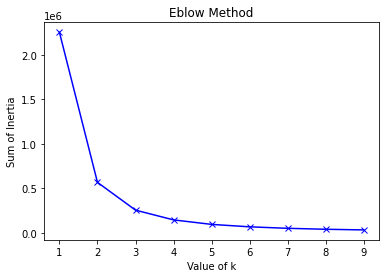

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

dff = pd.read_csv('/content/timecovers2.csv', usecols = ["Order", "Oc"])
km = KMeans(n_clusters=5, init='random')
km.fit_predict(dff)

sum = []
k = range(1,10)
for num_clusters in k:
  km = KMeans(n_clusters=num_clusters)
  km.fit(dff[['Order', 'Oc']])
  sum.append(km.inertia_)
plt.plot(k, sum, 'bx-')
plt.xlabel('Value of k')
plt.ylabel('Sum of Inertia')
plt.title('Eblow Method')
plt.show()

No handles with labels found to put in legend.


Cụm trung tâm: 
[[208.19863014   4.16438356]
 [ 68.67532468   4.26623377]]

Cụm 0: 
Số thành viên trong cụm:  146


Name      Occupation  Oc  Name1  cluster
0                        Pauline Sabin  Politics & Gov   1    216        0
1    Vere Ponsonby Earl of Bessborough  Politics & Gov   1    255        0
3                     Norman M. Thomas  Politics & Gov   1    209        0
7                           Zeppo Marx   Entertainment   3    279        0
8                  Kurt von Schleicher        Military   4    174        0
..                                 ...             ...  ..    ...      ...
292                   King Leopold III         Royalty   6    169        0
293                William B. Bankhead  Politics & Gov   1    267        0
296                      Joseph Stalin  Politics & Gov   1    158        0
297                        Walt Disney        Business   5    263        0
299             Madame Chiang Kai-shek  Politics & Gov   1    188        0

[146 rows x 5 columns]


Cụm 1: 
Số thành viên trong cụm:  154


Name      Occupation  Oc  Name1  cluster
2        Ellsworth Vines          Sports   2     54        1
4             Chico Marx   Entertainment   3     31        1
5           Groucho Marx   Entertainment   3     92        1
6             Harpo Marx   Entertainment   3     97        1
11   Henry L. Stevens Jr        Military   4    107        1
..                   ...             ...  ..    ...      ...
288   Ernest O. Lawrence         Science  14     63        1
290          Alfred Lunt         Theater   7      6        1
294        Jean Sibelius           Music  13    135        1
295     Colby M. Chester        Business   5     36        1
298      Chiang Kai-shek  Politics & Gov   1     30        1

[154 rows x 5 columns]

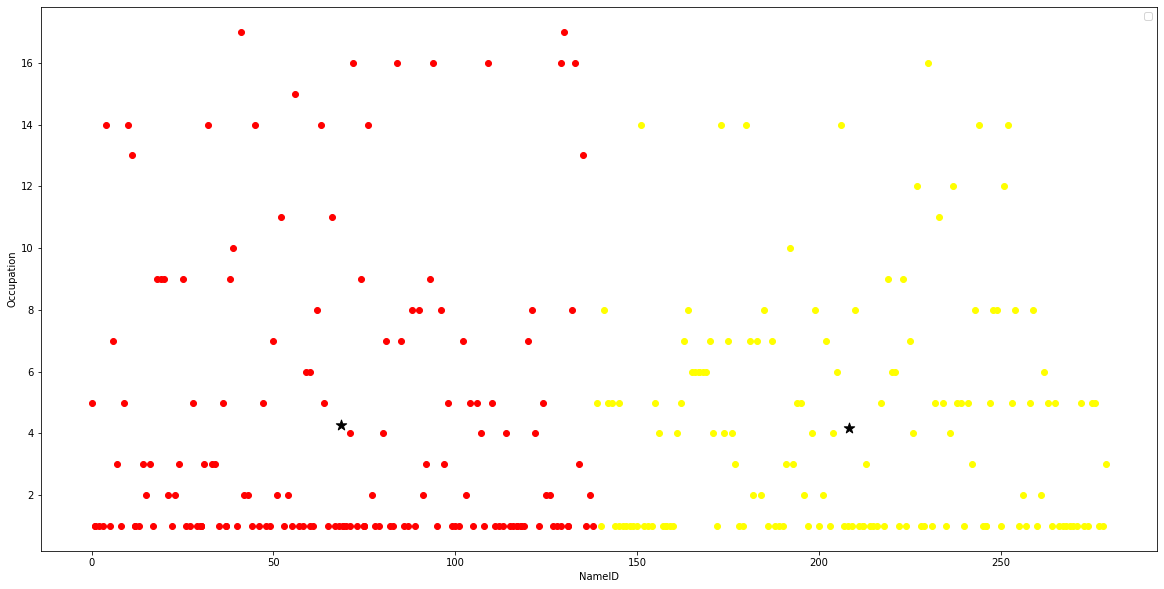

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans




#K-means
dff = pd.read_csv('/content/timecovers2.csv', usecols = ["Name1", "Oc", "Name", "Occupation"])
km = KMeans(n_clusters=2)
y_predict = km.fit_predict(dff[['Name1', 'Oc']])


dff['cluster'] = y_predict
dff['cluster'].drop_duplicates()

df0 = dff[dff.cluster==0]
df1 = dff[dff.cluster==1]

plt.figure(figsize=(20,10))

plt.scatter(df0.Name1,df0['Oc'],color='yellow')
plt.scatter(df1.Name1,df1['Oc'],color='red')

plt.xlabel('NameID')
plt.ylabel('Occupation')
plt.legend()

center = km.cluster_centers_
plt.scatter(center[:,0], center[:,1], marker="*", color='Black', s =120)
print("Cụm trung tâm: ")
print(center)
print()

print("Cụm 0: ")
print("Số thành viên trong cụm: ",len(df0))
display(df0)

print()
print("Cụm 1: ")
print("Số thành viên trong cụm: ",len(df1))
display(df1)

df0.to_csv ('cum0.csv', index = False, header=True)
df1.to_csv ('cum1.csv', index = False, header=True)

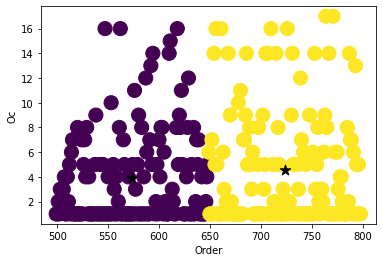

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans




#K-means
dff = pd.read_csv('/content/timecovers2.csv', usecols = ["Order", "Oc"])
km = KMeans(n_clusters=2, init='random')
km.fit_predict(dff)

labels = km.labels_

center = km.cluster_centers_
plt.clf()

plt.scatter(x = "Order", y ="Oc",  data=dff, c = labels, s=200)
plt.scatter(center[:,0], center[:,1], marker="*", color='Black', s =120)

plt.xlabel('Order')
plt.ylabel('Oc')
plt.show()










In [ ]:
#Chuyển qua kiểu dữ liệu số
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from networkx.algorithms import bipartite
from networkx.algorithms import community
import community.community_louvain as community_louvain
from networkx import edge_betweenness_centrality
from random import random
#!pip install scikit-learn
from scipy.spatial.distance import cdist
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/timecovers2.csv', usecols = ["Name", "Occupation"])
df.dropna() #loại bỏ các giá trị bị thiếu
df.drop_duplicates() #loại bỏ các giá trị bị trùng lặp
display(df) #xuất table
#print("So canh ", len(df))

from sklearn import preprocessing
from sklearn.cluster import KMeans
k = preprocessing.LabelEncoder()
df2 = df.copy()

k.fit(df2['Name'])
df2['Name1'] = k.transform(df2['Name']) 
df2['Name1'].drop_duplicates()

k.fit(df2['Occupation'])
df2['OC'] = k.transform(df2['Occupation']) 
df2['Oc'].drop_duplicates()

df2.to_csv (r'mydata4.csv', index = False, header=True)

Name      Occupation
0                        Pauline Sabin  Politics & Gov
1    Vere Ponsonby Earl of Bessborough  Politics & Gov
2                      Ellsworth Vines          Sports
3                     Norman M. Thomas  Politics & Gov
4                           Chico Marx   Entertainment
..                                 ...             ...
295                   Colby M. Chester        Business
296                      Joseph Stalin  Politics & Gov
297                        Walt Disney        Business
298                    Chiang Kai-shek  Politics & Gov
299             Madame Chiang Kai-shek  Politics & Gov

[300 rows x 2 columns]